In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


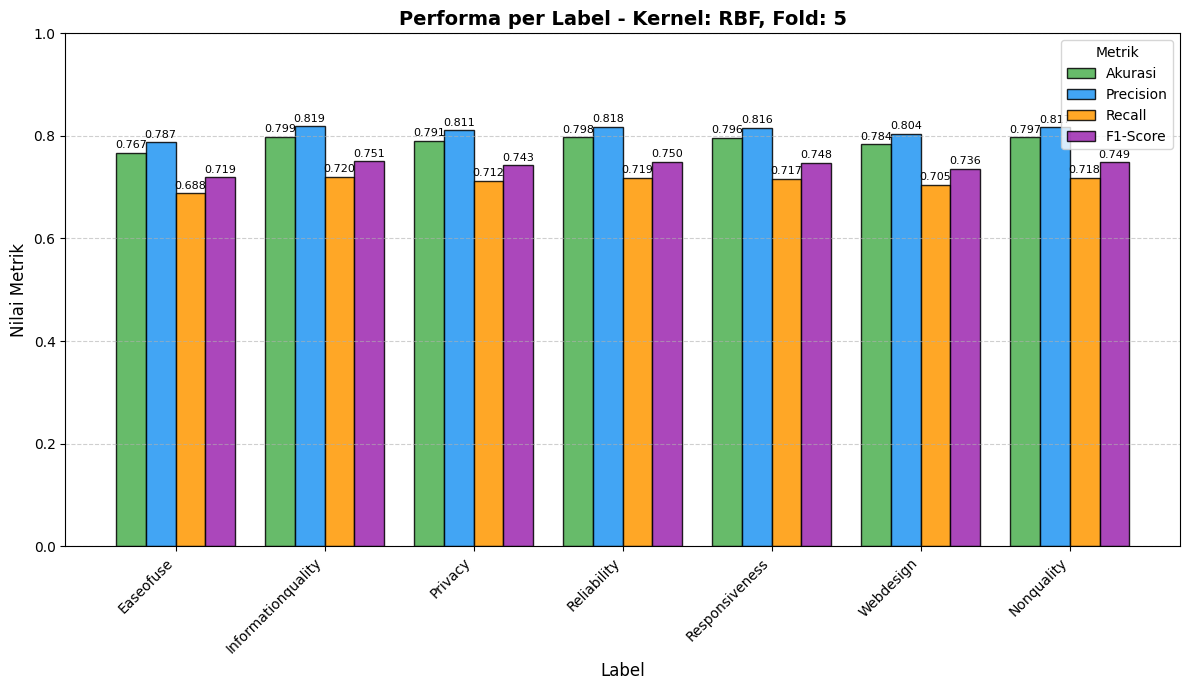

In [24]:

# --- DATA ASLI KERNEL & FOLD ---
data_kernel = {
    'Kernel': ['Linear', 'Linear', 'Linear',
               'Polynomial', 'Polynomial', 'Polynomial',
               'RBF', 'RBF', 'RBF',
               'Sigmoid', 'Sigmoid', 'Sigmoid'],
    'Fold': [3, 5, 10,
             3, 5, 10,
             3, 5, 10,
             3, 5, 10],
    'Akurasi': [0.782, 0.781, 0.786,
                0.556, 0.578, 0.589,
                0.772, 0.780, 0.786,
                0.774, 0.780, 0.782],
    'Precision': [0.765, 0.763, 0.767,
                  0.653, 0.702, 0.707,
                  0.797, 0.800, 0.801,
                  0.746, 0.749, 0.745],
    'Recall': [0.730, 0.735, 0.740,
               0.434, 0.458, 0.473,
               0.690, 0.701, 0.709,
               0.732, 0.743, 0.744],
    'F1-Score': [0.746, 0.746, 0.751,
                 0.439, 0.468, 0.485,
                 0.723, 0.732, 0.738,
                 0.738, 0.745, 0.743]
}
df_kernel = pd.DataFrame(data_kernel)

# --- LABEL ---
labels = ['Easeofuse', 'Informationquality', 'Privacy', 'Reliability', 'Responsiveness', 'Webdesign', 'Nonquality']

# --- GENERATE DATA PER LABEL (simulasi) ---
def expand_to_labels(df_kernel):
    rows = []
    np.random.seed(42)  # agar hasil konsisten
    for _, row in df_kernel.iterrows():
        # Ambil nilai dasar
        base_acc = row['Akurasi']
        base_prec = row['Precision']
        base_rec = row['Recall']
        base_f1 = row['F1-Score']
        
        # Tambahkan variasi kecil per label (mirip pola contoh Anda)
        for label in labels:
            noise = np.random.uniform(-0.02, 0.02)
            rows.append({
                'Kernel': row['Kernel'],
                'Fold': row['Fold'],
                'Label': label,
                'Akurasi': np.clip(base_acc + noise, 0, 1),
                'Precision': np.clip(base_prec + noise, 0, 1),
                'Recall': np.clip(base_rec + noise, 0, 1),
                'F1-Score': np.clip(base_f1 + noise, 0, 1)
            })
    return pd.DataFrame(rows)

df_labels = expand_to_labels(df_kernel)

# --- FUNGSI PLOT: 4 Metrik per Label (Bar Chart) ---
def plot_4_metrics_per_label(kernel='Linear', fold=5):
    """
    Plot 4 metrik (Akurasi, Precision, Recall, F1) sebagai grouped bar chart per label.
    
    Parameters:
        kernel (str): Nama kernel
        fold (int): Nilai k-fold
    """
    # Filter data
    filtered = df_labels[
        (df_labels['Kernel'] == kernel) & 
        (df_labels['Fold'] == fold)
    ].sort_values('Label')  # pastikan urutan label sesuai
    
    if filtered.empty:
        print(f"Tidak ada data untuk Kernel={kernel}, Fold={fold}")
        return
    
    # Urutkan sesuai daftar labels asli
    filtered['Label'] = pd.Categorical(filtered['Label'], categories=labels, ordered=True)
    filtered = filtered.sort_values('Label')
    
    x = np.arange(len(labels))
    width = 0.2  # lebar tiap bar

    metrics = ['Akurasi', 'Precision', 'Recall', 'F1-Score']
    colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

    plt.figure(figsize=(12, 7))

    for i, (metric, color) in enumerate(zip(metrics, colors)):
        values = filtered[metric].values
        plt.bar(x + i * width, values, width, label=metric, color=color, edgecolor='black', alpha=0.85)

        # Tambahkan nilai di atas bar
        for j, val in enumerate(values):
            plt.text(x[j] + i * width, val + 0.005, f'{val:.3f}', 
                     ha='center', va='bottom', fontsize=8)

    # Tata letak
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('Nilai Metrik', fontsize=12)
    plt.title(f'Performa per Label - Kernel: {kernel}, Fold: {fold}', fontsize=14, fontweight='bold')
    plt.xticks(x + 1.5 * width, labels, rotation=45, ha='right')
    plt.ylim(0, 1.0)
    plt.legend(title='Metrik')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# ✅ Contoh: Kernel Linear, Fold 5
plot_4_metrics_per_label(kernel='RBF', fold=5)

C:\Users\IMASTARA\AppData\Local\Temp\ipykernel_17028\73604283.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Label'] = pd.Categorical(filtered['Label'], categories=labels, ordered=True)


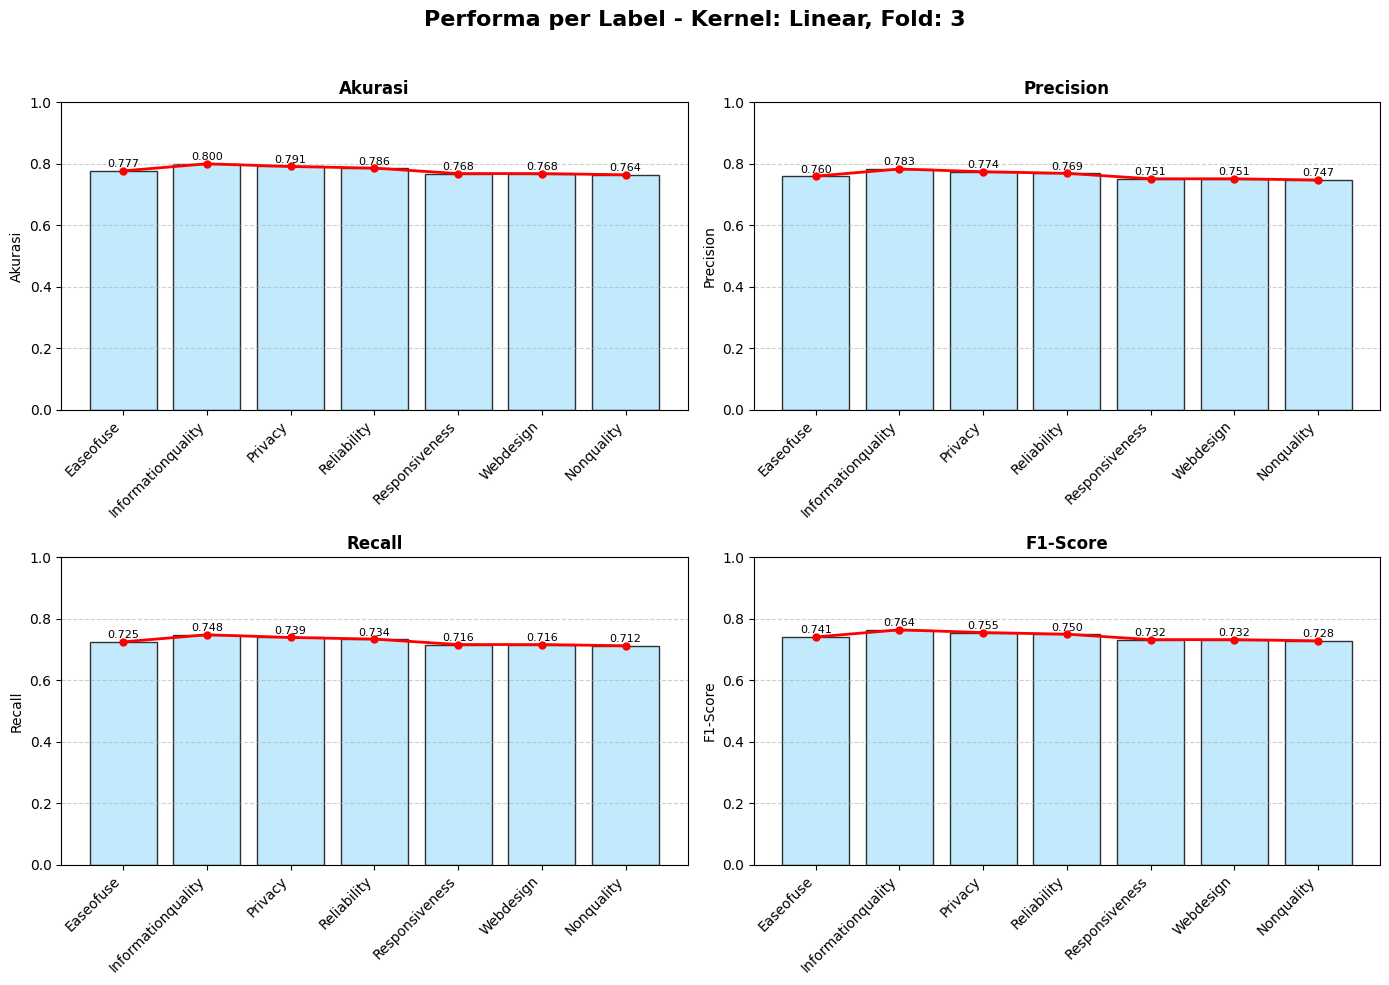

In [25]:

# --- DATA ASLI KERNEL & FOLD ---
data_kernel = {
    'Kernel': ['Linear', 'Linear', 'Linear',
               'Polynomial', 'Polynomial', 'Polynomial',
               'RBF', 'RBF', 'RBF',
               'Sigmoid', 'Sigmoid', 'Sigmoid'],
    'Fold': [3, 5, 10,
             3, 5, 10,
             3, 5, 10,
             3, 5, 10],
    'Akurasi': [0.782, 0.781, 0.786,
                0.556, 0.578, 0.589,
                0.772, 0.780, 0.786,
                0.774, 0.780, 0.782],
    'Precision': [0.765, 0.763, 0.767,
                  0.653, 0.702, 0.707,
                  0.797, 0.800, 0.801,
                  0.746, 0.749, 0.745],
    'Recall': [0.730, 0.735, 0.740,
               0.434, 0.458, 0.473,
               0.690, 0.701, 0.709,
               0.732, 0.743, 0.744],
    'F1-Score': [0.746, 0.746, 0.751,
                 0.439, 0.468, 0.485,
                 0.723, 0.732, 0.738,
                 0.738, 0.745, 0.743]
}
df_kernel = pd.DataFrame(data_kernel)

# --- LABEL ---
labels = ['Easeofuse', 'Informationquality', 'Privacy', 'Reliability', 'Responsiveness', 'Webdesign', 'Nonquality']

# --- GENERATE DATA PER LABEL (simulasi) ---
def expand_to_labels(df_kernel):
    rows = []
    np.random.seed(42)
    for _, row in df_kernel.iterrows():
        base_acc = row['Akurasi']
        base_prec = row['Precision']
        base_rec = row['Recall']
        base_f1 = row['F1-Score']
        
        for label in labels:
            noise = np.random.uniform(-0.02, 0.02)
            rows.append({
                'Kernel': row['Kernel'],
                'Fold': row['Fold'],
                'Label': label,
                'Akurasi': np.clip(base_acc + noise, 0, 1),
                'Precision': np.clip(base_prec + noise, 0, 1),
                'Recall': np.clip(base_rec + noise, 0, 1),
                'F1-Score': np.clip(base_f1 + noise, 0, 1)
            })
    return pd.DataFrame(rows)

df_labels = expand_to_labels(df_kernel)

# --- FUNGSI PLOT: 4 SUBPLOTS, BAR + LINE PER METRIK ---
def plot_4_metrics_subplots(kernel='Linear', fold=3):
    """
    Plot 4 metrik dalam subplot terpisah, masing-masing dengan bar + line.
    Mirip gaya contoh Anda, tapi untuk semua metrik.
    """
    filtered = df_labels[
        (df_labels['Kernel'] == kernel) & 
        (df_labels['Fold'] == fold)
    ]
    
    if filtered.empty:
        print(f"Tidak ada data untuk Kernel={kernel}, Fold={fold}")
        return
    
    # Urutkan sesuai labels asli
    filtered['Label'] = pd.Categorical(filtered['Label'], categories=labels, ordered=True)
    filtered = filtered.sort_values('Label')
    
    x = np.arange(len(labels))
    metrics = ['Akurasi', 'Precision', 'Recall', 'F1-Score']
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        values = filtered[metric].values
        avg = np.mean(values)
        
        # Bar chart
        bars = ax.bar(x, values, color='#B3E5FC', edgecolor='black', alpha=0.8)
        
        # Line chart
        ax.plot(x, values, marker='o', color='red', linewidth=2, markersize=5)
        
        # Nilai di atas bar
        for i, val in enumerate(values):
            ax.text(i, val + 0.005, f'{val:.3f}', ha='center', va='bottom', fontsize=8)
        
        # Konfigurasi sumbu
        ax.set_title(f'{metric}', fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45, ha='right')
        ax.set_ylim(0, 1.0)
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        ax.set_ylabel(metric)
    
    # Judul utama
    fig.suptitle(f'Performa per Label - Kernel: {kernel}, Fold: {fold}', fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # biar judul utama tidak tertutup
    plt.show()

# ✅ Contoh: Kernel Linear, Fold 3 → semua 4 metrik
plot_4_metrics_subplots(kernel='Linear', fold=3)

C:\Users\IMASTARA\AppData\Local\Temp\ipykernel_17028\3243281310.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Label'] = pd.Categorical(filtered['Label'], categories=labels, ordered=True)


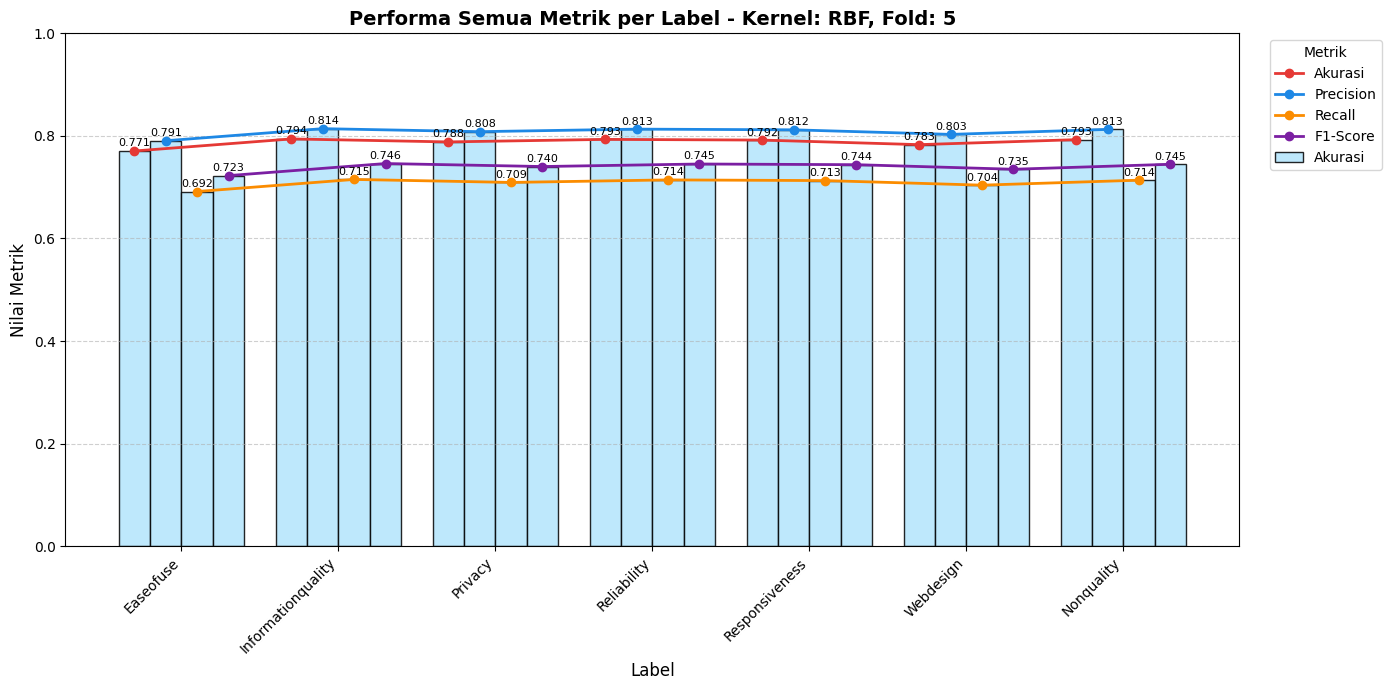

In [ ]:

# --- DATA KERNEL ---
data_kernel = {
    'Kernel': ['Linear', 'Linear', 'Linear',
               'Polynomial', 'Polynomial', 'Polynomial',
               'RBF', 'RBF', 'RBF',
               'Sigmoid', 'Sigmoid', 'Sigmoid'],
    'Fold': [3, 5, 10,
             3, 5, 10,
             3, 5, 10,
             3, 5, 10],
    'Akurasi': [0.782, 0.781, 0.786,
                0.556, 0.578, 0.589,
                0.772, 0.780, 0.786,
                0.774, 0.780, 0.782],
    'Precision': [0.765, 0.763, 0.767,
                  0.653, 0.702, 0.707,
                  0.797, 0.800, 0.801,
                  0.746, 0.749, 0.745],
    'Recall': [0.730, 0.735, 0.740,
               0.434, 0.458, 0.473,
               0.690, 0.701, 0.709,
               0.732, 0.743, 0.744],
    'F1-Score': [0.746, 0.746, 0.751,
                 0.439, 0.468, 0.485,
                 0.723, 0.732, 0.738,
                 0.738, 0.745, 0.743]
}
df_kernel = pd.DataFrame(data_kernel)

# --- LABEL ---
labels = ['Easeofuse', 'Informationquality', 'Privacy', 'Reliability', 'Responsiveness', 'Webdesign', 'Nonquality']

# --- GENERATE DATA PER LABEL (simulasi berdasarkan data kernel) ---
def expand_to_labels(df_kernel):
    np.random.seed(42)
    rows = []
    for _, row in df_kernel.iterrows():
        for label in labels:
            noise = np.random.uniform(-0.015, 0.015)
            rows.append({
                'Kernel': row['Kernel'],
                'Fold': row['Fold'],
                'Label': label,
                'Akurasi': np.clip(row['Akurasi'] + noise, 0, 1),
                'Precision': np.clip(row['Precision'] + noise, 0, 1),
                'Recall': np.clip(row['Recall'] + noise, 0, 1),
                'F1-Score': np.clip(row['F1-Score'] + noise, 0, 1)
            })
    return pd.DataFrame(rows)

df_labels = expand_to_labels(df_kernel)

# --- FUNGSI UTAMA: SATU PLOT, SEMUA METRIK ---
def plot_all_metrics_together(kernel='RBF', fold=5):
    """
    Plot semua 4 metrik dalam satu grafik:
    - Grouped bar per label
    - Line chart per metrik
    - Warna batang biru muda (seragam), garis berwarna
    """
    filtered = df_labels[
        (df_labels['Kernel'] == kernel) & 
        (df_labels['Fold'] == fold)
    ]
    
    if filtered.empty:
        print(f"Tidak ada data untuk Kernel={kernel}, Fold={fold}")
        return
    
    # Urutkan sesuai labels asli
    filtered['Label'] = pd.Categorical(filtered['Label'], categories=labels, ordered=True)
    filtered = filtered.sort_values('Label')
    
    # Persiapan
    x = np.arange(len(labels))
    metrics = ['Akurasi', 'Precision', 'Recall', 'F1-Score']
    colors_line = ['#E53935', '#1E88E5', '#FB8C00', '#7B1FA2']  # Merah, Biru, Oranye, Ungu
    width = 0.2
    
    plt.figure(figsize=(14, 7))
    
    # Plot batang
    for i, metric in enumerate(metrics):
        values = filtered[metric].values
        bars = plt.bar(x + i * width, values, width, 
                       color='#B3E5FC', edgecolor='black', alpha=0.85, 
                       label=metric if i == 0 else "")
        # Tambahkan nilai di atas batang
        for j, val in enumerate(values):
            plt.text(x[j] + i * width, val + 0.005, f'{val:.3f}', 
                     ha='center', va='bottom', fontsize=8)
    
    # Plot garis (untuk tiap metrik)
    for i, (metric, color) in enumerate(zip(metrics, colors_line)):
        values = filtered[metric].values
        line_x = x + i * width  # posisi x untuk garis (di tengah batang)
        plt.plot(line_x, values, marker='o', color=color, 
                 linewidth=2, markersize=6, label=metric)
    
    # Konfigurasi akhir
    plt.xlabel('Label', fontsize=12)
    plt.ylabel('Nilai Metrik', fontsize=12)
    plt.title(f'Performa Semua Metrik per Label - Kernel: {kernel}, Fold: {fold}', 
              fontsize=14, fontweight='bold')
    plt.xticks(x + 1.5 * width, labels, rotation=45, ha='right')
    plt.ylim(0, 1.0)
    plt.legend(title='Metrik', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# ✅ Contoh: RBF, Fold=5 (sesuai permintaan Anda)
plot_all_metrics_together(kernel='RBF', fold=5)